### 1. Combination & factorial

Given a `binary string` of $N=10$ elements $0$'s and $M=12$ elements $1$'s, how many unique permutations of this string start with $1$ ?

#### Solution
- Generally, any array of length $L$ with $K$ different letters $x_1, \ldots, x_K$ with the corresponding frequencies $N_1, \ldots, N_K$, that meant
$$ 0 < N_i \leq N - K \quad \forall i \in 1, \ldots, N \text{ and satisfied } \sum_{i=1}^K N_i = N $$
Then number of ways to re-arrange all the letters in this strings is 
$$ \dfrac{N!}{N_1 ! \times N_2 ! \times \ldots \times N_K!} $$
- In the case that the string of $N+M$ elements (including $N$ values of $0$ and $M$ values of $1$), but here we fixed the first element by $1$ then we only consider length $N+M-1$ with $M-1$ remained values of $1$ and $N$ of $0$ so the numbers of permutaions will be
$$ \dfrac{(N+M-1)!}{(M - 1)! \times N!} = \dfrac{12.13 \ldots 21}{1.2 \ldots 10}$$

In [1]:
import time
from solution import *

n = int(input()) # 10
m = int(input()) # 12
t0 = time.time()
print(f"For N:{n} and M:{m} then number of permutation by factorial: {factorial(n + m - 1) // (factorial(n) * factorial(m-1))}\nProgram finish after {(time.time() - t0):.6f} seconds")

For N:10 and M:12 then number of permutation by factorial: 352716
Program finish after 0.000112 seconds


Also, we will have the faster way to find this result (in case the very large numbers)

In [2]:
t0 = time.time()
res = 1
for k in range(m, n+m):
    res *= k / (k - n - 1)
print(f"For N:{n} and M:{m} then number of permutation by factorial: {int(res)}\nProgram finish after {(time.time() - t0):.6f} seconds")

For N:10 and M:12 then number of permutation by factorial: 352716
Program finish after 0.000141 seconds


-------------------

### 2. Proba to triangle
What is the probability of forming a triangle from breaking a stick?

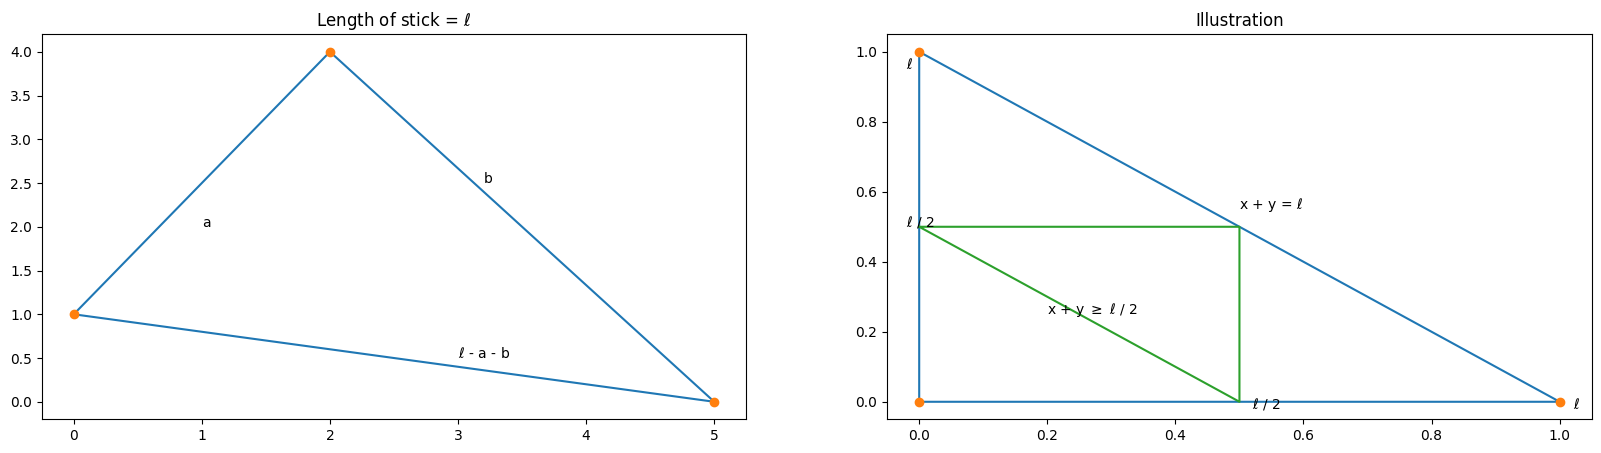

In [3]:
illustration_triangle_from_stick()

- Now, break the stick into 3 parts with lengths $a, b, \ell - a - b$
- We have these following constraints (based on triangle inequalities)
$$ \left\{\begin{matrix} a + b \geq \ell - a - b\\ a + (\ell - a - b) \geq b \\  b + (\ell - a - b) \geq a \end{matrix}\right. $$
we obtain
$$ \left\{\begin{matrix} 2(a + b) \geq \ell \\ \ell \geq \max \lbrace 2b, 2a \rbrace  \end{matrix}\right. $$
and this equivalent to
$$ \dfrac{\lbrace (x, y) : 0 \leq x, y \leq \frac{\ell}{2} , x + y \geq \frac{\ell}{2} \rbrace } { \lbrace (x, y) : 0 \leq x,y \leq \ell  ; x+y = \ell \rbrace } = \dfrac{1}{4} $$
--------------------

### 3. Determinant of matrix of Uniformly random variables
Let $X = \left(  \begin{matrix} X_1 & X_2 \\  X_2 & X_3 \end{matrix} \right)$ where $X_1, X_2, X_3 \sim \mathcal{U}([0, 1])$ and identically independent, find $\mathbb{E} [ \text{det} X] $

#### Solution
- Since $X_1, X_3$ are independence hence $\mathbb{E}(X_1 X_3) = \mathbb{E}X_1 \mathbb{E}X_3$
- From $ \text{det}X = X_1X_3 - X_2^2 $ implies
$$ \mathbb{E} [ \text{det} X] = \mathbb{E}(X_1 X_3) - \mathbb{E}(X_2^2) = \mathbb{E}X_1 \mathbb{E}X_3 -  \mathbb{E}(X_2^2) $$
- Next, 
$$ \begin{matrix} \displaystyle \mathbb{E}X_1 = \mathbb{E} X_3 = \int_0^1 x dx = \dfrac{1}{2} \\ \displaystyle \mathbb{E}X_2^2 = \int_0^1 x^2 dx = \dfrac{1}{3} \\\end{matrix} $$
- Therefore
$$ \mathbb{E} [ \text{det} X] = \dfrac{1}{2} \times \dfrac{1}{2} - \dfrac{1}{3} = \dfrac{-1}{12} $$

In [4]:
12*determinant_unif_rvs()

-1.001733814244052

### 4. Conditional expectation 1

You are trapped in a dark cave with three indistinguishable exists on the walls. 
- One of the exits takes you 3 hours to travel and takes you outside. 
- One of the other exits takes you 1 hour to travel and the other takes 2 hours, but both drop you back in the original cave through the ceiling, which is unreachable from the floor of the cave.

You have no way of marking which exits you have attempted. What is the expected time it takes for you to get outside

Example 1 ==============================================
Successfully escape the cave after 0 failed turns [total: 3 hours]
Example 2 ==============================================
At 0 th trial, you drop back in the cave after 2hour travelling [total: 1 hours]
At 1 th trial, you drop back in the cave after 2hour travelling [total: 2 hours]
Successfully escape the cave after 2 failed turns [total: 5 hours]
Example 3 ==============================================
At 0 th trial, you drop back in the cave after 1hour travelling [total: 2 hours]
At 1 th trial, you drop back in the cave after 1hour travelling [total: 4 hours]
Successfully escape the cave after 2 failed turns [total: 7 hours]


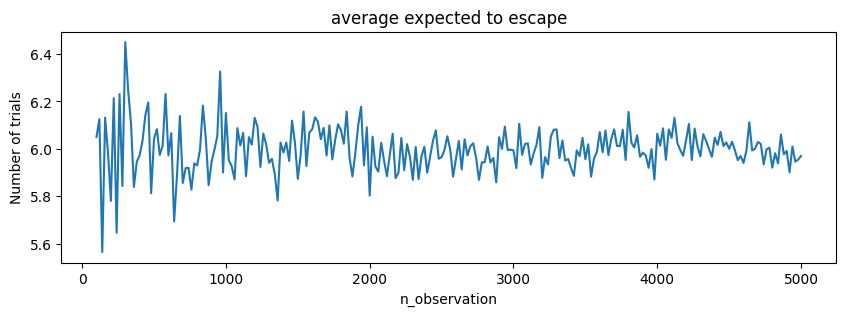

In [5]:
escape_cave_simulation()
# ==================================
n_trials = list(range(100, 5001, 20))
expec = [expectation_escape_cave(n) for n in n_trials ]
illustration_curve(n_trials, expec, "n_observation", "Number of trials", "average expected to escape")

### Solution
Let $X$ be the time that you will escape the cave, then we need to compute $\mathbb{E}X$, knowing that
- $\mathbb{E}\left( X \vert \text{true exit} \right) = 3$
- $\mathbb{E}\left( X \vert \text{back in cave with 1h} \right) = 1 + \mathbb{E}X $
- $\mathbb{E}\left( X \vert \text{back in cave with 2h} \right) = 2 + \mathbb{E}X $

and

$$ P(\text{true exit}) = P( \text{back in cave with 1h}) = P( \text{back in cave with 2h}) = \dfrac{1}{3}$$
Hence
$$ \begin{array}{cll} \mathbb{E}X &=& \displaystyle \sum_{i=1}^3 \mathbb{E} \left( X \vert \text{you are on the way i th} \right) \times P( \text{i th exit}) \\ &=& \dfrac{1}{3} \left[ 3 + ( 1 + \mathbb{E}X ) + ( 2 + \mathbb{E}X ) \right] \\ &=& 6 + \dfrac{2}{3} \mathbb{E}X \end{array}$$
which implies that $\mathbb{E}X = 6$.

-----------------
### 5. Conditional expectation 2
What is the expected number of (fair) coin flips to get three consecutive 
heads?

In [13]:
print(f"||{'idx.EX': ^10}|{'Example (number of trials to obtain `H,H,H` consecutively)': ^80}||")
for idx, n in enumerate(range(15,50,5)):
    rs = tossing_3HEAD_simulation(n)
    print(f"||{idx: ^10}|{','.join([ f'`{s}`' for s in rs]): <80}||")
expect_time_get_3H_consec(2000)

||  idx.EX  |           Example (number of trials to obtain `H,H,H` consecutively)           ||
||    0     |`T`,`H`,`T`,`T`,`H`,`T`,`H`,`H`,`H`                                             ||
||    1     |`H`,`T`,`T`,`T`,`T`,`H`,`T`,`H`,`T`,`T`,`T`,`T`,`T`,`T`,`H`,`H`,`T`,`T`,`H`,`H` ||
||    2     |`T`,`T`,`T`,`H`,`T`,`T`,`H`,`H`,`T`,`T`,`T`,`T`,`T`,`H`,`T`,`T`,`H`,`H`,`H`     ||
||    3     |`T`,`T`,`T`,`H`,`H`,`T`,`T`,`T`,`T`,`T`,`H`,`H`,`H`                             ||
||    4     |`T`,`H`,`T`,`T`,`H`,`T`,`H`,`T`,`H`,`H`,`H`                                     ||
||    5     |`H`,`H`,`T`,`T`,`H`,`H`,`H`                                                     ||
||    6     |`T`,`H`,`H`,`T`,`T`,`H`,`T`,`T`,`T`,`H`,`T`,`H`,`T`,`H`,`H`,`H`                 ||


14

#### Solution
By `conditional expectation`,
$$ \mathbb{E}X = Np^N + \sum_{k=1}^N (k + \mathbb{E}X) p^{k-1} (1-p) $$
where 
- $N$ is the number of consequence-results (here, $N=3$ is `HHH`)
- $p$ is the probability of `H`, here is fair-coin meant $\dfrac{1}{2}$
- $k$ is the index at the last-time we obtain the alternative of the result, e.g $k=1$ meant "**`T`**`HHH`", $k=2$ can be ("`T`**`T`**`HHH`", or "`H`**`T`**`HHH`")

For $N=3$ and $p = \dfrac{1}{2}$, we have

$$ \mathbb{E}X = \dfrac{3}{2^3} + \mathbb{E}X \left( \sum_{k=1}^3 2^{-k} \right) + \left( \sum_{k=1}^3 k2^{-k} \right)  $$
hence
$$ \mathbb{E}X = 14 $$

### 6. Distribution of transformed variable
- Let $U$ be a `uniform random variable` on the interval $(0, 1)$ 
- For any `continuous distribution function` $F$ define the random variable $X = F^{-1}(U)$.

What is the distribution of $X$?

#### Solution
For any `uniform distribution variable` $U$ and any `continuous distribution function` $F(x)$, we have

$$ F_U(u) = P(U < u) = u, \qquad ∀ u ∈ (0, 1) $$

and the `c.d.f` of any $X = F^{-1}(U)$ will be defined by

$$ P(X < x) = P(U < F(x)) = F_U(F(x)) = F(x) $$

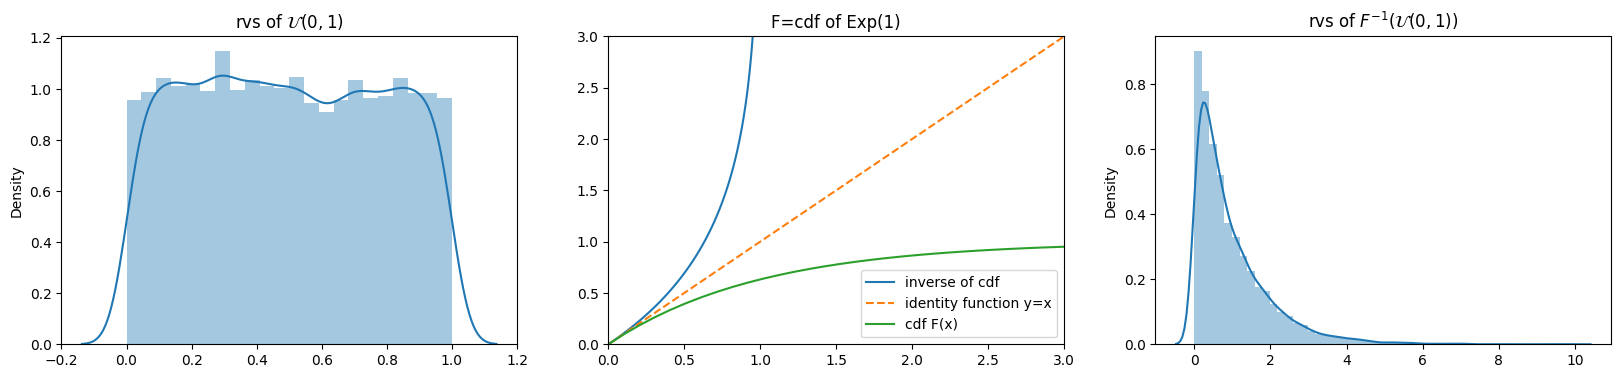

In [14]:
import warnings

warnings.filterwarnings("ignore")
def cd_func(x): return (1 - np.exp(-x)) * (x >= 0)
def inverse_cdf(x): return -np.log(1 - x)*(x > 0)*(x < 1)
inv_transform_rvs(cd_func, inverse_cdf, 'F=cdf of Exp(1)')

Now, we have

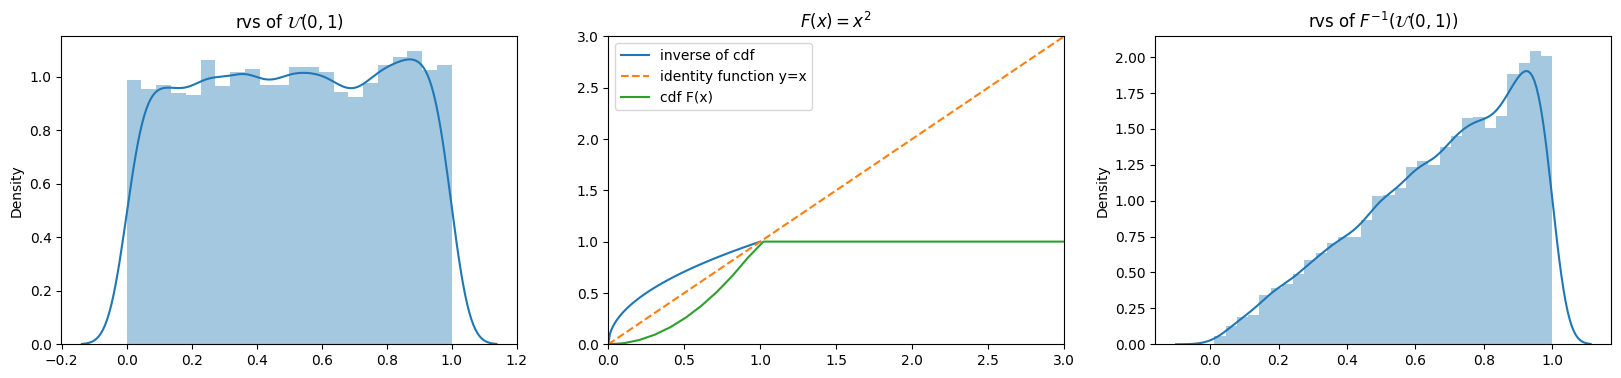

In [15]:
def f(x): return x**2 * (x > 0) * (x <= 1) + (x > 1) 
def f1(x): return x**0.5
inv_transform_rvs(f, f1, '$F(x) = x^2$')